## Remmember: This may be used for NON comercial uses.

In [1]:
import _pickle as cPickle
from collections import Counter
from itertools import chain
import matplotlib.pyplot as plt
import os
import numpy as np
%matplotlib inline

### globals

In [28]:
FN = 'embedding'
seed = 42 #the answer to the question. 
vocab_size = 40000
embedding_dim = 100
lower = False #don't lower case the text
empty = 0 # RNN mask of no data
eos = 1  # end of sentence
start_idx = eos+1 # first real word

### Read tokenized headlines and descriptions.

In [6]:
FN0 = 'vocab-embedding' # File from the dataset
with open('data/{}.pkl'.format(FN0),'rb') as fp:
    heads, desc = cPickle.load(fp)# keywords are not used in this project

In [7]:
if lower:
    heads = [h.lower() for h in heads]
    desc = [h.lower() for h in desc]
    
i = 0
heads[i]

'Worcester breakfast club for veterans gives hunger its marching orders'

In [8]:
desc[i]

'VETERANS saluted Worcester\'s first ever breakfast club for ex-soldiers which won over hearts, minds and bellies. \n \nThe Worcester Breakfast Club for HM Forces Veterans met at the Postal Order in Foregate Street at 10am on Saturday. \n \nThe club is designed to allow veterans a place to meet, socialise, eat and drink, giving hunger and loneliness their marching orders. \n \nFather-of-two Dave Carney, aged 43, of Merrimans Hill, Worcester, set up the club after being inspired by other similar clubs across the country. \n \nHe said: "As you can see from the picture, we had a good response. Five out of the 10 that attended said they saw the article in the newspaper and turned up. \n \n"We even had an old chap travel from Droitwich and he was late on parade by three hours. \n \n"It\'s generated a lot of interest and I estimate (from other veterans who saw the article) that next month\'s meeting will attract about 20 people. Onwards and upwards." \n \nHe said the management at the pub ha

In [11]:
len(heads),len(set(heads))

(1000000, 802209)

In [12]:
len(desc),len(set(desc))

(1000000, 882970)

### Build vocab

In [15]:
def get_vocab(lst):
    vocabcount = Counter(w for txt in lst for w in txt.split())
    vocab = map(lambda x: x[0], sorted(vocabcount.items(),key=lambda x: -x[1]))
    return vocab,vocabcount

In [26]:
vocab,vocabcount = get_vocab(heads+desc)

most popular tokens

In [24]:
#print(vocab[:50])
#print(len(vocab))
vocab

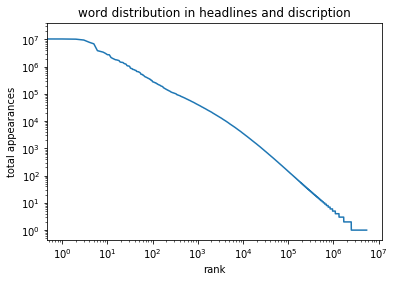

In [27]:
plt.plot([vocabount[w] for w in vocab])
plt.gca().set_xscale("log", nonposx='clip')
plt.gca().set_yscale("log", nonposy='clip')
plt.title('word distribution in headlines and discription')
plt.xlabel('rank')
plt.ylabel('total appearances');

### Index words

In [29]:
def get_idx(vocab,vocabcount):
    word2idx = dict((word, idx+start_idx) for idx,word in enumerate(word))
    word2idx['<empty>'] = eos
    word2idx['<eos>'] = eos
    idx2word = dict((idx,word) for word,idx in word2idx.iteritems())
    return word2idx,idx2word

In [30]:
word2idx,idx2word = get_idx(vocab,vocabcount)

NameError: name 'vocabcount' is not defined